# Exercise 6: More plotting options

In this homework, you'll practice more advanced plotting options from `ggplot`.

Just like the prior homework, we will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Multipanel figures (7 points)

Last week, we visualized the change in life expectancy over time for every country in one plot. An alternative method is to use facet panels to split each country into its own plot.

To start, load the `gapminder` dataset from the last set of exercises, as well as the `tidyverse`.

In [1]:
library(gapminder)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.2.0     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.2     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next, create a subset of data that only includes the 25 countries from the `Americas` continent. Now we can add a `facet_wrap` layer to our line plot to create the panels by country. Additionally, to make the x-axis values easier to read, add a `theme` layer to rotate the text by 45 degrees.


The downloaded binary packages are in
	/var/folders/bv/wcq8jkrd26sg1y3bg18qjglh0000gp/T//RtmpcLzC8v/downloaded_packages


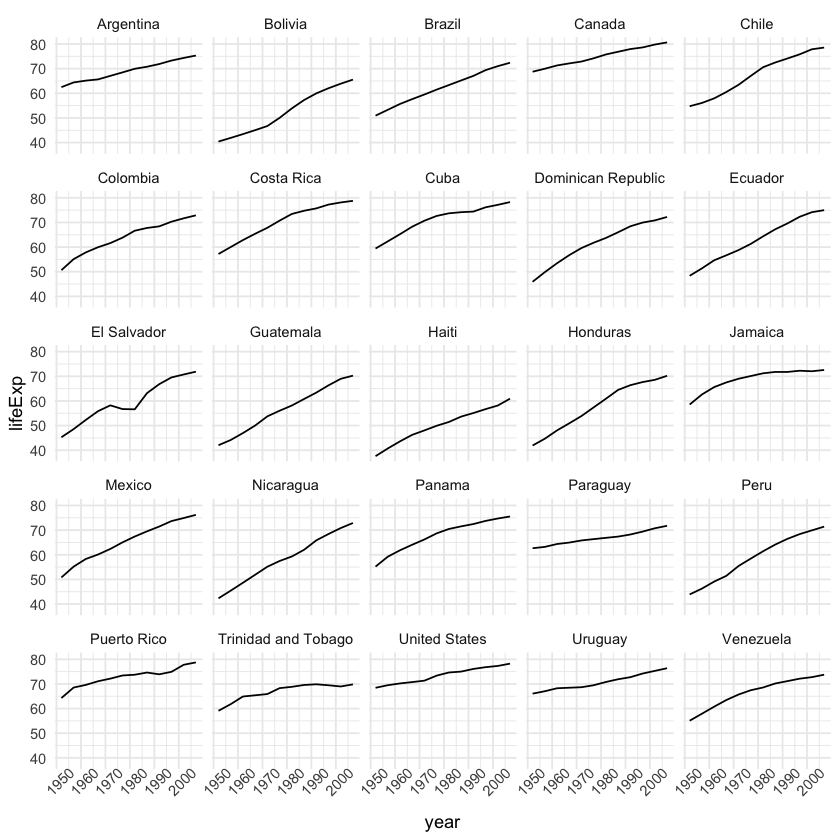

In [33]:
install.packages("ggthemes") #use ggthemes to rotate x axis text
library(ggthemes)

#create subset of data that includes americas only 
am_only <- gapminder %>%
    filter(continent == "Americas")

#head(am_only,20)

ggplot(am_only, aes(x=year,y=lifeExp)) + 
    geom_line() + 
    facet_wrap(. ~ country) +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45))


Imagine that we wanted to publish this figure in a manuscript. Make the following changes to the code from the previous question to create a cleaner figure:

* Change the y-axis label (using `labs` layer)
* Add a figure title (using `labs` layer)
* Add a legend (using `labs` layer)
* Rotate x-axis value text to 90 degrees

*Hint: legend titles are set using the same names used in the aes specification. So, we need to add a `color` aes mapping to the global plot definition and reference this in the `labs` layer to specify the legend name.*

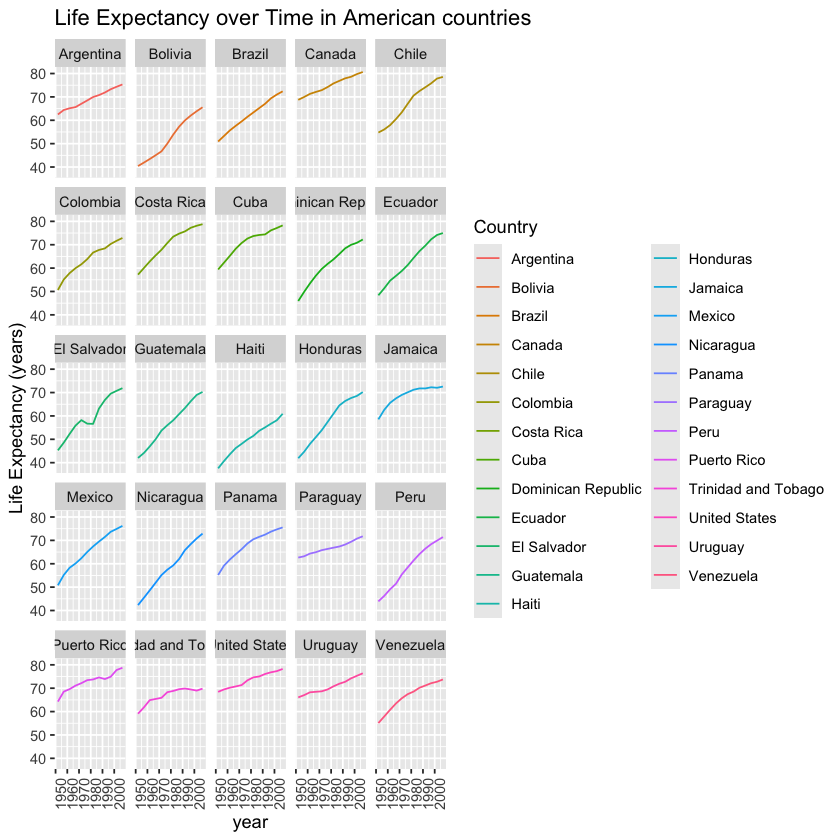

In [80]:
ggplot(am_only, aes(x=year,y=lifeExp, color = country)) + 
    geom_line() + 
    facet_wrap(. ~ country) +
    theme(axis.text.x = element_text(angle = 90)) + 
    labs(
        y = "Life Expectancy (years)",
        title = "Life Expectancy over Time in American countries",
        color = "Country"        
      )



Now let's look at how life expectancy varies by continent over time. Create a multipanel figure where each panel contains five boxplots (one for each continent) and each panel represents one year of data. Include a legend instead of x-axis title and labels.

*Hint: the `theme` layer allows you to set attributes as `element_blank()`.*

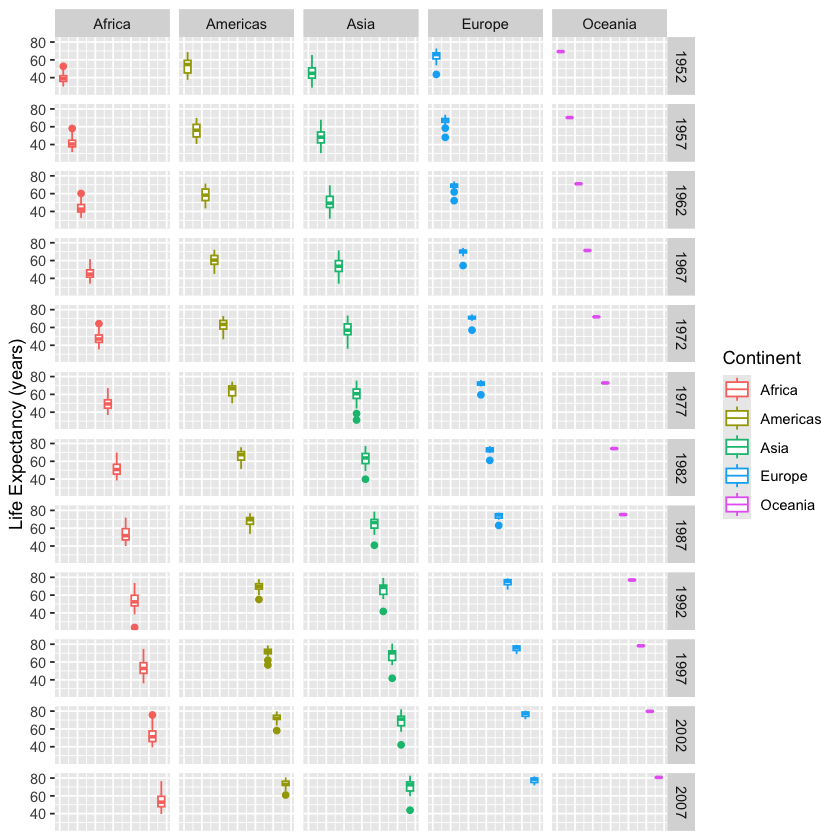

In [93]:
ggplot(gapminder, aes(x = year, y=lifeExp, color = continent)) + 
    geom_boxplot(orientation="x") +  
    facet_grid(year ~ continent) + 
    #theme_minimal() + 
    theme(                                   #make x-axis blank
        axis.title.x = element_blank(), 
        axis.text.x = element_blank(),  
        axis.ticks.x = element_blank(), 
      ) +
    labs(
        y = "Life Expectancy (years)",
        color = "Continent"        
      )


---
# 2. Increasing data density (3 pts)

The above plots have nice readability, but they probably use more ink than is necessary. Take your boxplots from the last question and edit them to improve the data-to-ink ratio.

Hint: Double check your axis labels!

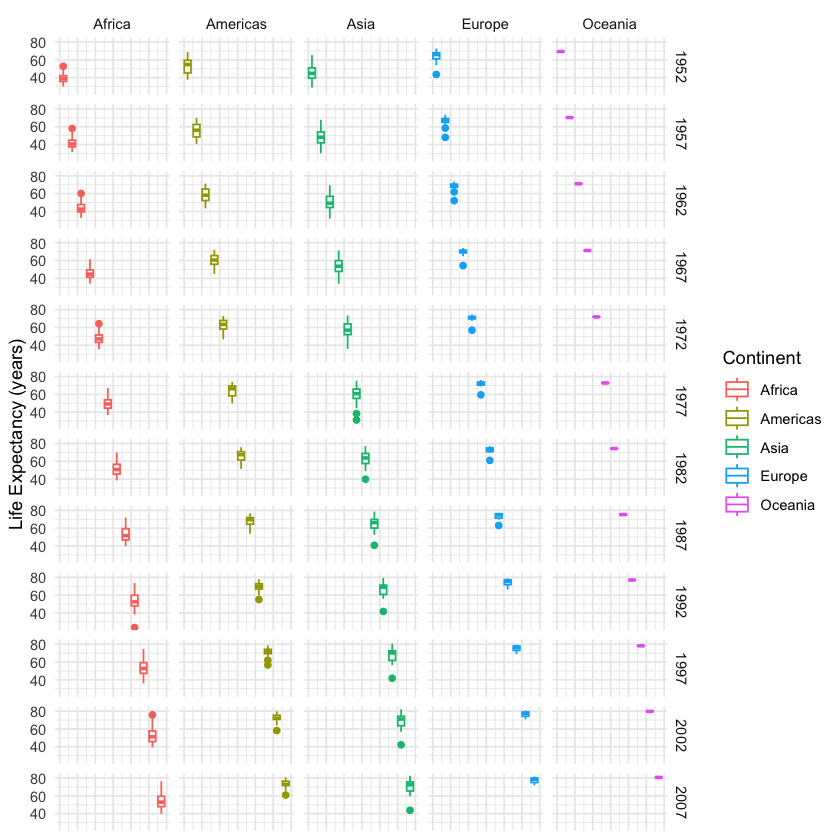

In [98]:
ggplot(gapminder, aes(x = year, y=lifeExp, color = continent)) + 
    geom_boxplot(orientation="x") +  
    facet_grid(year ~ continent) + 
    theme_minimal() + 
    theme(                                   #make x-axis blank
        axis.title.x = element_blank(), 
        axis.text.x = element_blank(),  
        axis.ticks.x = element_blank(), 
      ) +
    labs(
        y = "Life Expectancy (years)",
        color = "Continent"        
      )

**DUE:** 11:59pm EST, Feb 12, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*

**GenAI Utilization** Did you utilize any generative AI tools on this assignment? If so, please list the item and the paste respective prompt you used.

In [ ]:
I didn't properly read instructions for the box plot parts. After getting GPT's answer, I realized my mistake was that I was trying to plot just the american countries and using countries as one of the factors. After this, I used the whole dataset again and input continent as the second factor (as GPT advised). Here was my prompt  "How do I use facet_grid correctly?\nHere is what I have right now: I am trying to make each row one year and each column one continent. Both row and continent are one column in the data frame am_only: ggplot(am_only, aes(x=year,y=lifeExp)) + #color = country)) + geom_line() + facet_grid(year ~ country)\"